In [1]:
import numpy as np
import matplotlib.pyplot as plt

from abcd_pyhf import ABCD

In [2]:
def gaussian_2d(mean, sigma, n, seed=None):
    cov = ((sigma[0] ** 2, 0),
           (0, sigma[1] ** 2))
    return np.random.default_rng(seed).multivariate_normal(mean, cov, n).T

In [3]:
def exponential_2d(sigma, n, seed=None):
    rng = np.random.default_rng(seed)
    x = rng.exponential(sigma[0], n)
    y = rng.exponential(sigma[1], n)
    return x, y

In [4]:
def get_region_counts(x, y, x_cut, y_cut):
    return {
        'A': sum((x > x_cut) & (y > y_cut)),
        'B': sum((x > 0) & (x < x_cut) & (y > y_cut)),
        'C': sum((x > x_cut) & (y > 0) & (y < y_cut)),
        'D': sum((x > 0) & (x < x_cut) & (y > 0) & (y < y_cut))
    }

In [5]:
signal_mean = (1.25, 1.5)
signal_sigma = (0.5, 0.5)
n_full_signal = 100000
n_signal = 60

background_sigma = (1, 0.5)
n_background = 500

x_cut = 1
y_cut = 1

seed = 4

full_signal_x, full_signal_y = gaussian_2d(signal_mean, signal_sigma, n_full_signal, seed)
signal_x = full_signal_x[:n_signal]
signal_y = full_signal_y[:n_signal]
background_x, background_y = exponential_2d(background_sigma, n_background, seed)

signal_yields = get_region_counts(full_signal_x, full_signal_y, x_cut, y_cut)
signal_uncertainty = signal_yields['A'] ** -0.5
background_only_yields = get_region_counts(background_x, background_y, x_cut, y_cut)

print('background only yields:')
print(background_only_yields)

signal_plus_background_x = np.concatenate((signal_x, background_x))
signal_plus_background_y = np.concatenate((signal_y, background_y))

signal_plus_background_yields = get_region_counts(signal_plus_background_x, signal_plus_background_y, x_cut, y_cut)

print('signal + background yields:')
print(signal_plus_background_yields)

background only yields:
{'A': 27, 'B': 40, 'C': 152, 'D': 281}
signal + background yields:
{'A': 59, 'B': 61, 'C': 155, 'D': 285}


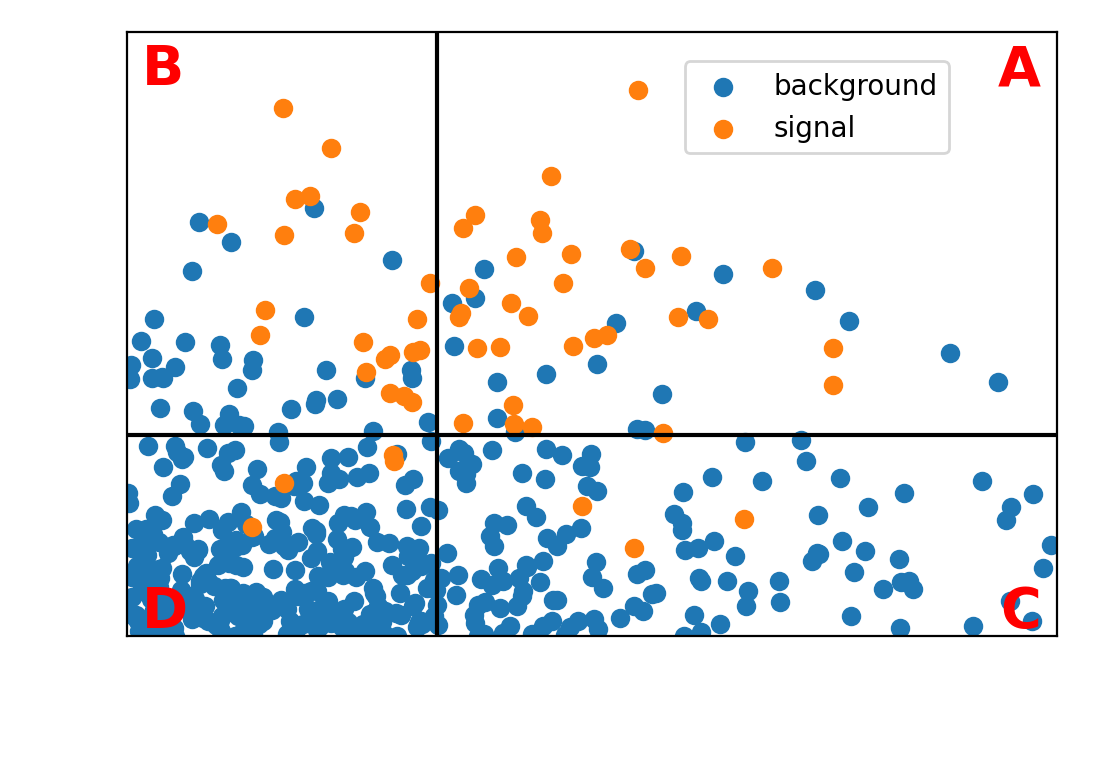

In [6]:
plt.gcf().set_dpi(200)
plt.plot((0, 3), (y_cut, y_cut), color='black')
plt.plot((x_cut, x_cut), (0, 3), color='black')
plt.scatter(background_x, background_y, label='background')
plt.scatter(signal_x, signal_y, label='signal')
plt.xlabel('x', color='white', fontsize=14)
plt.ylabel('y', color='white', fontsize=14, labelpad=8, rotation='horizontal')
plt.gca().tick_params(labelsize=12, colors='white')
plt.xlim(0, 3)
plt.ylim(0, 3)
region_label_color = 'red'
region_label_fontsize = 20
region_label_fontweight = 'bold'
plt.text(2.95, 2.95, 'A', color=region_label_color, fontsize=region_label_fontsize, fontweight=region_label_fontweight, horizontalalignment='right', verticalalignment='top')
plt.text(0.05, 2.95, 'B', color=region_label_color, fontsize=region_label_fontsize, fontweight=region_label_fontweight, verticalalignment='top')
plt.text(2.95, 0.05, 'C', color=region_label_color, fontsize=region_label_fontsize, fontweight=region_label_fontweight, horizontalalignment='right')
plt.text(0.05, 0.05, 'D', color=region_label_color, fontsize=region_label_fontsize, fontweight=region_label_fontweight)
plt.legend(loc=(0.6, 0.8))
plt.show()

In [7]:
abcd_background_only_prefit = ABCD({key: value for key, value in background_only_yields.items() if key != 'A'}, signal_yields, signal_uncertainty)
abcd_signal_plus_background_prefit = ABCD({key: value for key, value in signal_plus_background_yields.items() if key != 'A'}, signal_yields, signal_uncertainty)

In [8]:
abcd_background_only = ABCD(background_only_yields, signal_yields, signal_uncertainty)
abcd_signal_plus_background = ABCD(signal_plus_background_yields, signal_yields, signal_uncertainty)

In [9]:
abcd_background_only_prefit.bkg_only_signal_region_estimate

(21.635163395681463, 4.031800948522644)

In [10]:
abcd_signal_plus_background_prefit.bkg_only_signal_region_estimate

(33.15413870570727, 5.3439918232551396)

In [11]:
abcd_background_only.bkg_only_signal_region_estimate

(23.987023866230253, 3.2541098747214523)

In [12]:
abcd_signal_plus_background.bkg_only_signal_region_estimate

(45.85077936479888, 4.84587816592029)

In [13]:
abcd_background_only_prefit.signal_region_yield_p_value(background_only_yields['A'])

0.20934965

In [14]:
abcd_signal_plus_background_prefit.signal_region_yield_p_value(signal_plus_background_yields['A'])

0.00170421

In [15]:
abcd_background_only.q0_p_value()

array(0.20623925)

In [16]:
abcd_signal_plus_background.q0_p_value()

array(0.00289792)

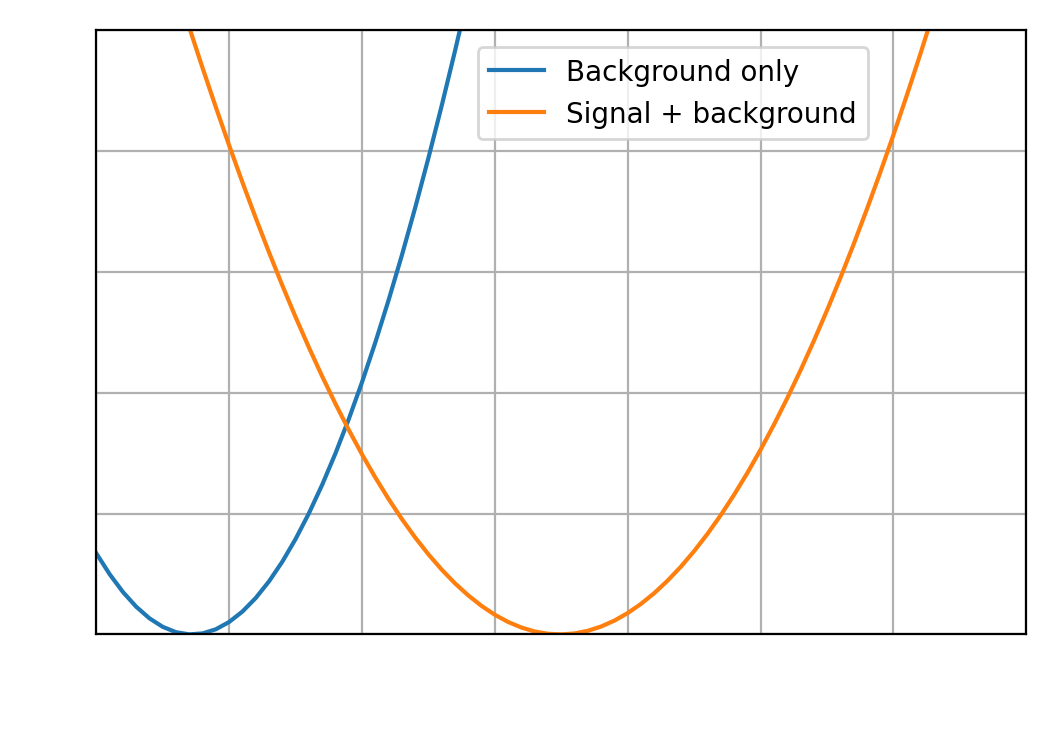

In [17]:
plt.gcf().set_dpi(200)
b = abcd_background_only.twice_nll_plot
sb = abcd_signal_plus_background.twice_nll_plot
plt.grid()
plt.xlim(0, 70)
plt.legend([b, sb], ['Background only', 'Signal + background'], loc=[0.41, 0.82])
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(colors='white')
plt.show()

/home/user/miniconda3/envs/iris-hep/lib/python3.9/site-packages/pyhf/infer/calculators.py:369: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


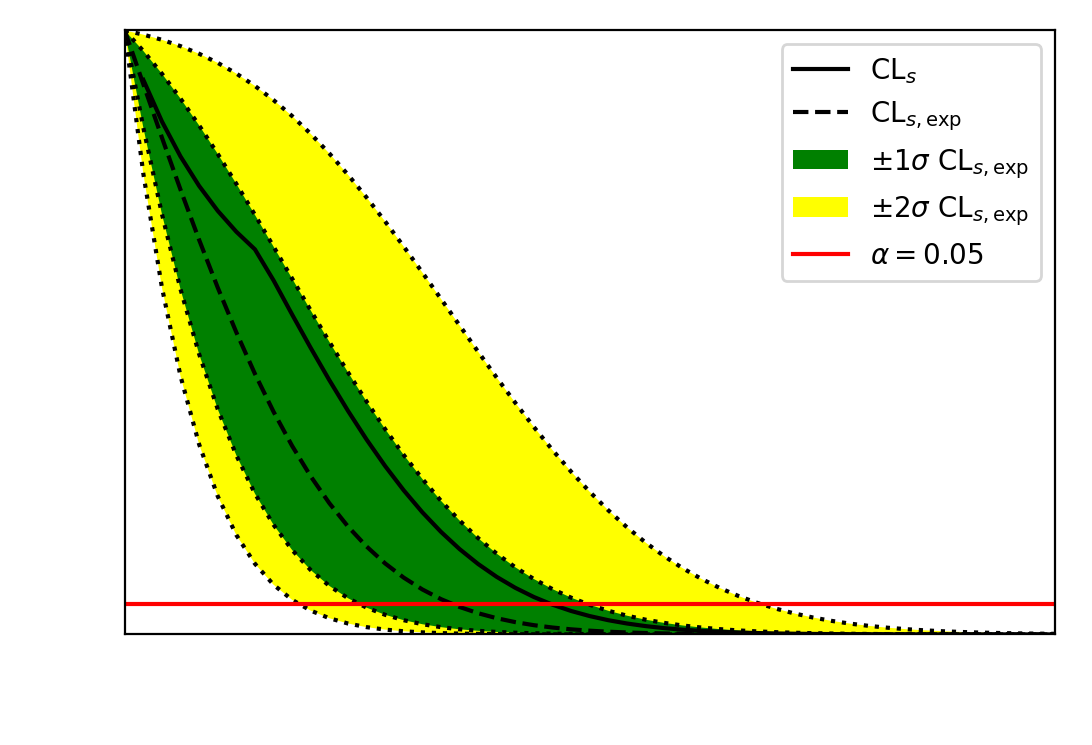

In [18]:
plt.gcf().set_dpi(200)
abcd_background_only.brazil_plot
plt.xlim(0, 50)
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(colors='white')
plt.show()

/home/user/miniconda3/envs/iris-hep/lib/python3.9/site-packages/pyhf/infer/calculators.py:369: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


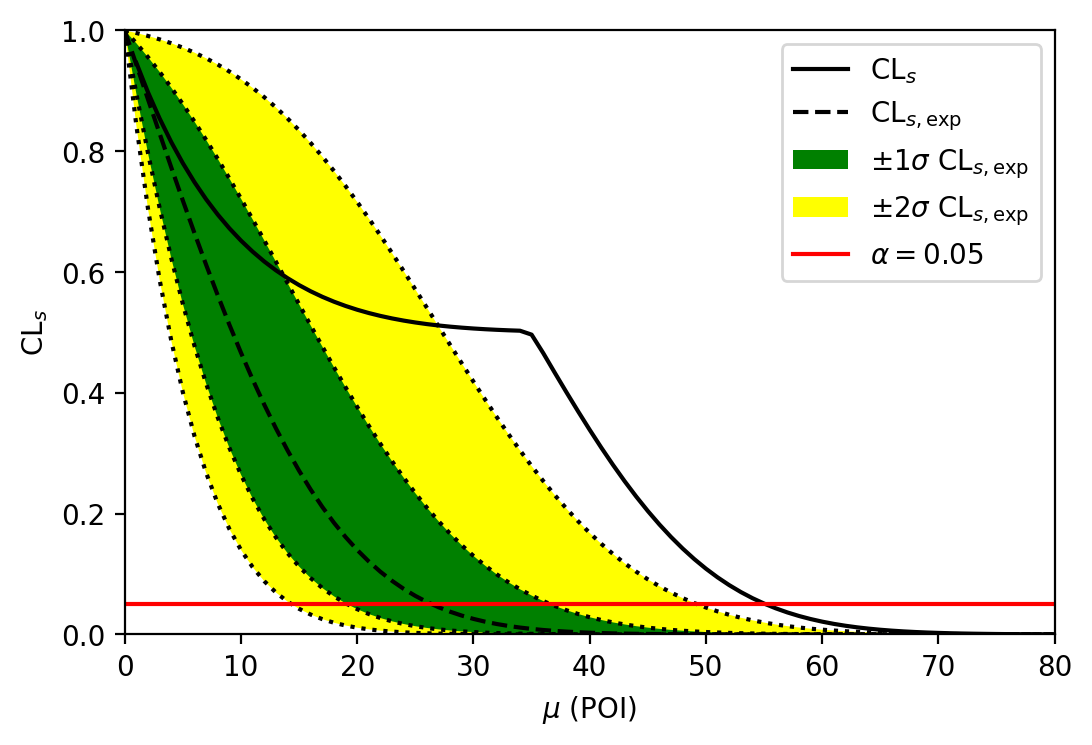

In [19]:
plt.gcf().set_dpi(200)
abcd_signal_plus_background.brazil_plot
plt.xlim(0, 80)
plt.show()

In [20]:
abcd_background_only.upper_limit

(22.94277716378107,
 [9.40810488156905,
  12.641926710532484,
  17.655718962058288,
  24.918579268876414,
  34.245760715668055])

In [21]:
abcd_signal_plus_background.upper_limit

(55.13925692038218,
 [14.370591940528628,
  19.155988197769762,
  26.431541016363155,
  36.648582328443496,
  49.26030843018758])